# **The PLAsTiCC Astronomy "Starter Kit"**
### -Gautham Narayan, 20180921

This notebook was developed for LSST PLAsTiCC on <a href="https://www.kaggle.com/c/plasticc-2018">Kaggle</a>. You can participate in the challenge there! 

***

In [1]:
# You can edit the font size here to make rendered text more comfortable to read
# It was built on a 13" retina screen with 18px
from IPython.core.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 18px; }</style>"))

# we'll also use this package to read tables
# it's generally useful for astrophysics work, including this challenge
# so we'd suggest installing it, even if you elect to work with pandas
from astropy.table import Table

This Project Jupyter notebook provides an introduction to some of the astrophysics that might be relevant for the "Photometric LSST Astronomical Time-series Classification Challenge" (PLAsTiCC) on Kaggle. It's intended to provide some domain knowledge to data scientists taking part in the challenge, and may even prove useful to some of the astronomers competing. You can use it <a href="https://medium.com/codingthesmartway-com-blog/getting-started-with-jupyter-notebook-for-python-4e7082bd5d46">as you would a regular Jupyter notebook</a> or as a slide show with the <a href="https://damianavila.github.io/RISE/index.html">RISE</a> notebook extension and clicking the <img src="media/RISE_button.png" align="vertical-align:middle:" width="5%"> button.

Because of the length of the notebook (there's a fair bit to cover!), the slide show will likely be a gentler introduction, though there are points in the regular notebook view that are skipped over entirely in the slide show. If an image looks a bit too large on a slide, you should be able to scroll down.

While there's no practical way to cover all of the background astrophysics in a single Jupyter notebook, there should be enough relevant material to tackle the challenge. You can also safely ignore it and dive right in and do things your own way. Astrophysics is interesting stuff though, and if you are curious and want to know more about something, or how to do something that isn't covered here then just ask! You'll find us on the Kaggle forum for this challenge! 

***

## Contents:
- [1. LSST, PLAsTiCC and You](#section1)
    - [1a. The Large Synoptic Survey Telescope](#section1a)
    - [1b. Light Curves: Time-series of Brightness of Astronomical Sources](#section1b)
    - [1c. How Astronomers have Studied Astronomical Sources Thus Far](#section1c)
    - [1d. The PLAsTiCC Challenge: Classifying Astronomical Sources with Light Curves](#section1d)
- [2. A Primer on the Data - Light Curves](#section2)
    - [2a. Time](#section2a)
    - [2b. Passband](#section2b)
    - [2c. Flux and Flux Error](#section2c)
- [3. Exploring the Light Curves](#section3)
- [4. Primer cont'd - Metadata Provided with Light Curves](#section4)
    - [4a. Coordinates on the Sky](#section4a)
    - [4b. Galactic Coordinates](#section4b)
    - [4c. Redshift](#section4c)
    - [4d. A view of our cosmic neighborhood](#section4d)
    - [4e. Cosmology](#section4e)
    - [4f. Dust](#section4f)

***

## 1. LSST, PLAsTiCC and You
<a id="section1"></a>

### 1a. The Large Synoptic Survey Telescope
<a id="section1a"></a>

PLAsTiCC is intended to simulate sources that vary with time in the night-sky as seen during the first three years of operation of the <a href="http://www.lsst.org">Large Synoptic Survey Telescope (LSST)</a>. 

The LSST (illustrated below) is a telescope with an 8.4 meter primary mirror diameter being built high up in Atacama desert of Chile, on a mountain called Cerro Pachon.

<center><img src="media/LSST_night.jpg"></center>

#### _Figure 1: The LSST Telescope, Credit: LSST/NSF/AURA/Todd Mason Productions Inc._

The telescope is going to have a 3.2 gigapixel camera that's about the size of an adult human to take images of the night sky. Those pixel numbers may not seem all that meaningful without a reference, so here is the LSST field-of-view  (FoV) compared against the full moon and a similar class telescope:

<center><img src="media/LSST_FoV.jpg"></center>

#### _Figure 2: The LSST Field of View compared to a camera on a similar telescope and the Moon. Credit: Zelko Ivezic, LSST_

This large FoV is what makes LSST so revolutionary. If you like photography, LSST has a 6.5 *meter* effective aperture and a focal ratio of f/# of 1.23. 

This means that LSST can make a map of the entire southern sky, resolving details that are smaller than the width of a human hair held at arm's length... every 4 nights. 

That's a data rate of 20--40 terabytes, or about 1 US Library of Congress every night. It is, for want of a better word, ginormous.

The difference is even more stark when compared against telescopes that are both smaller and have smaller FoVs - like most everything astronomers have access to now. The Hubble Space Telescope only has a 2.4 meter mirror, and here's it's FoV... relative to one of those full moons:

<center><img src="media/HST_field_of_view.jpg"></center>

#### _Figure 3: The Hubble Space Telescope's field of view compared to the Moon_

Hubble isn't just looking at a smaller piece of sky, it is also collecting light from this region much more slowly than LSST. 

Consequently, each and every week LSST will find more sources that vary with time than Hubble has ever seen... in its entire 28+ year life. 

### 1b. Light Curves: Time-series of Brightness of Astronomical Sources
<a id="section1b"></a>

Scanning the entire sky repeatedly means we can identify astrophysical sources in the night sky that change in brightness over time, and we can create a plot of the the brightness vs time. 

The *time-series* of these change in brightness. We call these time-series, "light curves." 

Here's an illustration of one of these source - supernova 1998bu, imaged with the 1.2m telescope at the Fred Lawrence Whipple Observatory. 

In [2]:
%%HTML
<div align="middle">
<video width="60%" controls>
      <source src="media/SN98bu_LC.mp4" type="video/mp4">
</video>
</div>

#### _Figure 4: The light curve of supernova 1998bu. Credit: Peter Challis, Harvard/CfA_ 

The left panel shows you how the supernova event looked, while the right panel shows a plot of the brightness of the supernova, measured using a process called "photometry," used to determine the light curve.

LSST presents us with a great opportunity here because it will find an order of magnitude (or more) of these kinds of events than astronomers have ever observed. 

The same event rate also presents a new challenge - supernovae aren't the only sorts of variable and transient events in the night sky. 

Here's an (incomplete!) tree diagram of the various kinds of variable sources in the night sky:

<center><img width="90%" src="media/variability_tree.jpg"></center>

#### _Figure 5: The hierarchy of variable and transient sources. Credit: Laurent Eyer and Nami Mowlawi, Université de Genève_

Some sources are intrinsically variable, while others are extrinsic - they vary, not because they the source itself has some fundamental physical property that causes them to vary, but rather because of extra attributes - e.g. rotation, or forming part of a binary system that just happens to eclipse along our line of sight from Earth. Some sources vary periodically, while others show random or stochastic behavior. Yet others, like supernovae, typically explode once and fade away. 

The sources in the training set are from a mixture of these different astrophysical classes, including:

- Secular, Pulsating and Eruptive Variable Stars
- Tidal Disruption Events
- Kilonovae
- Supernovae of different types
- Active Galactic Nucleii 
- Microlensing Events
- Eclipsing Binaries

The diversity of these sources is important. 

LSST data will be useful for many different scientific studies by different groups - from studying stars in our Galaxy to understand how solar systems like ours formed, probing nuclear physics with brief burps before stars explode, how galaxies themselves formed and the role massive stars play in shaping their chemistry, to measuring how much matter there is in our Universe - and everything in between. 

#### _It'll likely answers questions we don't even know to ask yet._

There's a lot that we can get out of understanding the time-domain of our Universe.

That said, we're being deliberately vague about exactly what sorts of astrophysical sources you'll find in the data, and even what `target` number in the data corresponds to what astrophysical class.

We'll give you a few external resources for these events in a companion notebook, if you are determined to augment the training set. 

Note that there's been exactly one kilonova event ever seen (we hope this will be out of date by the time LSST turns on though!), so it's not really possible to provide multiple examples in some cases!

### 1c. How Astronomers have Studied Astronomical Sources Thus Far
<a id="section1c"></a>

To determine the class of any particular astrophysical source, we currently need lots of observational data. 

At present, we classify the sources not using just their light curves, but using more detailed follow-up with other telescopes. We use "spectrographs" - instruments that, much like a prism, disperse a beam of light, spreading different colors over position - to study astrophysical sources.

<center><img width="50%" src="media/prism.jpg"></center>

#### _Figure 6: A prism dispersing light, creating a spectrum, open access jpeg._

Dispersing the light like this is called "spectroscopy", and allows us to look for characteristic atomic signatures from astrophysical sources. 

#### _Figure 7: Spectra of different kinds of supernovae, with their atomic signatures labeled, Credit: Daniel Kasen (UC Berkeley)._

<center><img width="80%" src="media/SN_Spectra.jpg"></center>

This is the most reliable method for determining what a point of light in the night sky actually is, and there's a ton of information you can get from it. 

You can learn more about it <a href="https://ed.ted.com/lessons/how-do-we-study-the-stars-yuan-sen-ting">here</a>. 

Unfortunately, spectroscopy takes a tremendous amount of telescope time and there aren't enough telescopes in the world _combined_ to keep up with the LSST event rate. 

Additionally, if you remember the video of the supernova, you saw it getting brighter initially and then getting fainter. The light from the supernova explosion changes with time and therefore so do the spectra. We try to obtain a spectrum close to when the object is brightest, but often we can't schedule a telescope in advance exactly then, and even when we do the weather might not cooperate. If you can't see the stars on a cloudy night, then it's probably not good conditions to try and get a spectrum.

Other fields have similar issues - if we wanted to uniquely identify a human being for instance, we could test a DNA sample, but that'd be completely impractical given the number of people we encounter. Largely, we use facial recognition. There's less detailed information available, but you can still use it to identify people you see, and categorize them into family, friends, co-workers, strangers etc.

We need to invent new techniques to classify astrophysical sources without using the detailed "DNA sample" that you'd get from spectroscopy, but using the less detailed information in their light curves - their "photometry."

**This is where PLAsTiCC and you come in.**

### 1d. The PLAsTiCC Challenge: Classifying Astronomical Sources with Light Curves
<a id="section1d"></a>

PLAsTiCC is based on a simulation of the light curves that LSST can expect to collect (it doesn't exist yet, so we can't give you real LSST data!). These light curves have realistic time-sampling and noise properties, as well as realistic astrophysical effects for a variety of the sources in the variability tree. 

These sources, even closely related classes, can have light curves that look quite different from each other. 

You saw that different kinds of supernovae have different spectra. 
This also means that they'll have different light curves. 

Different rise and fall times, different absolute energies, a different structure of bumps and wiggles. 

<center><img width="70%" src="media/smartt_supernovae_diversity.jpg"></center>

#### _Figure 8: The diversity of Supernovae Light Curves, Credit: Stephen J. Smartt, Queen's University, Belfast, https://www.nature.com/articles/nature11643_

The light curves of these explosive transients can look radically different from the light curves of periodic variables. Take for instance the eclipsing binary system <a href="http://simbad.u-strasbg.fr/simbad/sim-id?protocol=html&Ident=Y+Psc&NbIdent=1&Radius=2&Radius.unit=arcmin&submit=submit+id">Y Piscium</a>. This is an eclipsing binary system (a name which the animation below should help explain) with a light curve that looks like this:

<center><img src="media/Y_Psc_Animated_LC.gif"></center>

#### _Figure 9: The light curves of an eclipsing binary system, Credit: AstroLab, Durham University, https://community.dur.ac.uk/physics.astrolab/eclipsing.html_

The exact details of each eclipsing binary system determine the properties of the light curve - how bright each star is, their relative sizes, how fast they orbit each other - but all of these events have the same general light curve shape. And of course, depending on the period, the time scale of the variability can be anything from hours to years!

Other variable stars have very different light curve shapes from eclipsing binaries. Indeed, variable stars were the first example of astronomers using light curve shapes for classification. 

Here's a hand-drawn illustration of some of the different known types of variable stars from <a href="https://archive.org/details/popularsciencemo69newy">Popular Science Monthly in 1906</a> (page 179).
<center><img width="80%" src="media/atlas_of_variable_stars.png"></center>

#### _Figure 10: The Atlas of Variable Stars, Credit: Popular Science Monthly, from 1906_

The variables here (from left to right, top to bottom) are a Mira, an eclipsing binary and "RR Lyrae" of type AB and an RR Lyrae of type C. Eclipsing binaries are still called Algol-type stars some times, but note that they look really different from the bottom two panels, and if you look at the x-axis on the horizontal panel, you'll notice that the characteristic time-scale there is much different from the rest of them!

And you have more information than just the one time-series. 

If you watched that video of the supernova video carefully, you'll have noticed that there's actually two traces of the brightness - one that covers the optical, and one that covers the infrared. 

This is because our telescope detectors are sensitive to wavelengths of light well beyond the range our eyes can see. 

We use optical filters - elements that only permit a certain range of wavelengths to pass through - to measure the brightness in different "passbands." 

Here's the filter exchanger for the LSST camera (adult human for scale):

In [3]:
%%HTML
<div align="middle">
<video width="90%" controls>
      <source src="media/LSST_filter_change.mp4" type="video/mp4">
</video>
</div>

#### _Figure 11: LSST Filter Exchanger, Credit: LSST/NSF/AURA/Todd Mason Productions Inc._

This is a bit like taking a low-resolution spectrum - the light is still being split up and we're getting information about different colors, but it's not as detailed. 

With a spectrum, you can distinguish absorption and emission lines of atomic lines that are a few "Angstroms" across (the symbol for it is an A with the circle on top) - very approximately 10,000 times smaller than the width of an average strange of human hair. 

The advantage of LSST and its giant camera is that it can take an image of several 100,000 astrophysical sources through a single filter at the same time. 

Each filter is a summing the total amount of light in one small region of the spectrum, so you can't measure narrow atomic lines anymore, but you can get many more light curves in the time it takes to get one spectrum. 

Even the biggest spectrographs with optical fibers dedicated to each sources can only manage a few thousand sources at most...

... in addition to taking much longer to collect enough photons to have a statistically significant measurement.

How much light gets through each filter depends not only on the properties of the filter, but really the transmission of everything between the camera and the source - the atmosphere, dust in our galaxy, dust in the galaxy of the source... 

We refer to the total transmission of each filter as the "passband" (and often use the terms interchangeably). 

Each object has observations in every passband. The passbands that LSST will use are called *u, g, r, i, z*, and *y*. In other words, each object has six time-series you can use for classification. 

<center><img src="media/LSST_passbands.jpg"></center>

#### _Figure 12: The throughput of the LSST passbands with wavelength. Your eyes are sensitive to just the *g and r* bands_

The training sample is what the entire astronomical community can expect to have before LSST turns on, except where astronomers have a mishmash of observations from different telescopes (something you'll have to deal with if you decide and try to augment it from the literature), you get a nice homogeneous training set. 

The test set is a version what we expect to have after 3 years of LSST operations. 

It's much, much bigger than the training set. 

You'll have to design your algorithm with speed as a consideration. 

Also, the training set is not perfectly representative - we can usually only classify the brightest objects we find with spectroscopy. To do well in PLAsTiCC though, you'll have to classify everything.

You can even expect sources in the test set that aren't in the training set - we expect to find new classes of objects with LSST that we've never seen before, and we've simulated light curves based on theoretical predictions of how they ought to look!

**Your mission, should you choose to accept it, is to classify the things that go bump in the night.**

You can win prizes, eternal glory, and the satisfaction of knowing that you made a real impact and a valuable contribution to the biggest astrophysical experiment to ever be attempted!

There's not much time too - LSST is coming up fast. Here's a construction picture from August 2018, and it is looking a lot like the render at the top of this page! 

<center><img width="60%" src="media/LSST_construction.jpg"></center>

#### _Figure 13: The LSST telescope under construction on Cerro Pachon in Chile, Credit: Gianluca Lombardi, Gemini Observatory_

***

## 2. A Primer on the Dataset - Light Curves
<a id="section2"></a>

We've included some example light curve data along with this notebook to illustrate some of the astrophysical effects you'll encounter in the full data set. 

This example data is simpler than the real data - it has only four of the six passbands, and different properties from the full sample, so that the signal is more obvious, and only a few classes. 

These simplifications will make it easier to work with and highlight some of the issues you'll encounter will the full dataset.

The other reason why this is using example data and not the training data supplied with the challenge is that we've identified the target classes in the challenge with random integers. This should help reduce astronomer's advantage of domain knowledge - astronomers will have to identify which class corresponds to which integers before they can take advantage of their understanding of the properties of different classes. Most astronomers only specialize in a few kinds of objects though, so even their domain knowledge isn't complete. 

Lets begin by looking at the format of the light curve and explaining what the columns are (we'll get to the header in Section 3):

In [4]:
obj1 = Table.read('data/fake010.csv', format='csv')
obj1

object_id,mjd,passband,flux,flux_err,detected_bool
int64,float64,int64,float64,float64,int64
10,56210.172,1,5.659,3.7,1
10,56210.188,2,21.32,3.245,1
10,56210.203,3,13.28,3.221,1
10,56210.234,4,9.579,3.85,1
10,56218.172,1,49.22,1.654,1
10,56218.191,2,114.6,2.376,1
10,56218.211,3,88.85,2.261,1
10,56219.156,4,75.01,2.394,1
10,56221.273,1,62.28,4.17,1


The first of the columns is just the `object_id`. In the real data, you'll get many objects in the same CSV, and you'll need some way of getting all the observations for one object. `object_id` gives you that index.

### 2a. Time
<a id="section2a"></a>


The second column, labeled `mjd`, is the time that LSST took an image. More on why it is called this later. First, you should get a sense for what the pattern of LSST observations is.

On any given night, LSST will begin by taking a picture of one patch for 15--30 seconds long (the results from PLAsTiCC might help decide the exposure time!).

This is followed by a gap of 30 minutes -- 2 hours (the results from PLAsTiCC might help decide this too!) where the telescope looks at other patches of sky, before coming back to the original patch of sky.

It will then take another 15--30 second picture. 

The data from these two images on the same night are combined to remove spurious glitches like cosmic rays, asteroids, airplane contrails etc.

LSST will then come back to the same patch of sky, the next night, but it will take the picture in a different passband. 

LSST will repeat this cycle, returning to the original filter on the original patch of sky 1--2 weeks later. 

This pattern of how a telescope observes the night sky is called the "cadence" and it has a large effect on how well the light curve of an astrophysical source is sampled. 

Because the characteristic times that we conduct our observations on is a day (we can't observe when the sun is up after all!), we measure time in units of decimal day. 

The specific time format we will use in PLAsTiCC is called the Modified Julian Date (MJD) - simply the number of decimal days from midnight on November 17, 1858. 

(Historical parenthetical: The original Julian Date which began counting up from zero on noon on Jan 1, 4713 BC. When the Soviet Sputnik launched, the Smithsonian Astrophysical Observatory decided to make this zero reference date a little more current. The SAO needed a way to keep track of Sputnik's orbits but the reference for the Julian date was so far in the past that the numbers were too large for their VAX/VMS system to handle. So they did the simple thing and made the reference date of the VAX/VMS system the same as the reference date for their new time system - creatively named the "Modified Julian date" - and consequently, most of astronomy. This date is conveniently 2400000.5 - the extra 0.5 because the VAX reference starts at midnight, while the Julian Date starts from noon.)

If you want another time format like UNIX time (which counts decimal seconds from a reference date of Jan 1st, 1970), then it's easy to convert between the two. 

The UNIX epoch in MJD is 40587 (or JD 2440587.5), so you'd use:

$$\textrm{UNIX time} = (\textrm{MJD} - 40587) \times 86400$$

where 86400 is the number of seconds in 24 hours.

### 2b. Passband
<a id="section2b"></a>

The next column, labeled `passband` tells you the passband that the observation at time `mjd` was taken. 

We've mapped the passband names to integers, but the mapping is straightforward:

$$ \{ u \rightarrow 0,~g \rightarrow 1,~r \rightarrow 2,~i \rightarrow 3,~z \rightarrow 4,~y \rightarrow 5 \} $$

You probably guessed as much looking at Figure 10, but $u$ covers the ultraviolet, $g$ covers what your eye perceives as blue/green, $r$ covers red, $i$ covers the infrared. 

I'm not even going to pretend that $z$ and $Y$ have good reasons to be named what they are. 

Unlike other multi-channel time-series data, you do not get all the other channels or passbands at once. There's only one filter in front of the camera at any time.

(Historical parenthetical: See <a href="http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?2008JAVSO..36..110M&amp;data_type=PDF_HIGH&amp;whole_paper=YES&amp;type=PRINTER&amp;filetype=.pdf">Milone and Young, 2008</a>, Sec. 5)

### 2c. Flux and Flux Error
<a id="section2c"></a>

The last two columns in this file are named `flux` contains the actual photometry - the measurements of brightness of this source as a function of time. 

The 68% confidence interval of the measurement is in the `flux_err` column. 

It's worth noting that while astrophysical sources have to emit enough light to be brighter than the background sky (more or less the definition of what a source is), the flux can be positive or negative.

This is because of how we actually detect these sources against the background sky. 

LSST will have a reference image for each position on the sky - called a "template". 

Each image it takes of a particular region is differenced with the template. 

Each image then includes a contribution from the source and the background. 

Objects for which the total flux from source and background is higher than that of the template have positive flux, and when the total flux is lower than the template flux, they have have negative flux.

As the source flux changes with time, some sources can have some flux entries as positive and others that are negative.

For some objects, the contribution from the source will fade over time, leaving just the background - which is about the same level as the flux in the template, so some flux entries will be consistent with zero.

Here's how that looks:

<center><img src="media/2007-X-025_R.PS.png"></center>
<center><img src="media/2007-X-025_I.PS.png"></center>

#### _Figure 14: Difference Imaging "Postage Stamps" (Reference, Image, Difference)_

The template image in the left panels is from 2004, while the "current" images are from 2007. The third panel has the difference between the two - and you can see there's some light left over near the fuzzy galaxy. The two rows correspond to roughly the $r$ filter and the $i$ filter. 

You can see the properties of the two sets of images are different. There's a much higher background in the bottom row thanks to a bright source off to the top right. 

This is also one of the reasons why LSST is being built on top of a mountain high in the Atacama desert of Chile - it's far away from bright city lights and the sky background is lower, allowing us to detect fainter sources. 

This particular source was a supernova, but the same technique can be used to identify all manner of variable and transient sources in astronomical images.

Because of this difference imaging techniques, objects have to have changed significantly with respect to the template to be detected by LSST. Whether or not they were detected with respect to the template is reported as `detected_bool`.

## 3. Exploring the Light Curves
<a id="section3"></a>

To get a better sense of what the `flux` and `flux_err` look like, let's take a look at some of their light curves.

We'll begin by defining a class to handle this example, with a few illustrative features you can use for classification:

In [5]:
import os
import numpy as np
import scipy.stats as spstat
import matplotlib.pyplot as plt
from collections import OrderedDict

%matplotlib notebook

In [6]:
class LightCurve(object):
    '''Light curve object for PLAsTiCC formatted data'''
    
    _passbands = OrderedDict([(0,'C4'),\
                              (1,'C2'),\
                              (2,'C3'),\
                              (3,'C1'),\
                              (4,'k'),\
                              (5,'C5')])
    
    _pbnames = ['u','g','r','i','z','y']
    
    def __init__(self, filename):
        '''Read in light curve data'''

        self.DFlc     = Table.read(filename, format='ascii.csv')
        self.filename = filename.replace('.csv','')
        self._finalize()
     
    # this is some simple code to demonstrate how to calculate features on these multiband light curves
    # we're not suggesting using these features specifically
    # there also might be additional pre-processing you do before computing anything
    # it's purely for illustration
    def _finalize(self):
        '''Store individual passband fluxes as object attributes'''
        # in this example, we'll use the weighted mean to normalize the features
        weighted_mean = lambda flux, dflux: np.sum(flux*(flux/dflux)**2)/np.sum((flux/dflux)**2)
        
        # define some functions to compute simple descriptive statistics
        normalized_flux_std = lambda flux, wMeanFlux: np.std(flux/wMeanFlux, ddof = 1)
        normalized_amplitude = lambda flux, wMeanFlux: (np.max(flux) - np.min(flux))/wMeanFlux
        normalized_MAD = lambda flux, wMeanFlux: np.median(np.abs((flux - np.median(flux))/wMeanFlux))
        beyond_1std = lambda flux, wMeanFlux: sum(np.abs(flux - wMeanFlux) > np.std(flux, ddof = 1))/len(flux)
        
        for pb in self._passbands:
            ind = self.DFlc['passband'] == pb
            pbname = self._pbnames[pb]
            
            if len(self.DFlc[ind]) == 0:
                setattr(self, f'{pbname}Std', np.nan)
                setattr(self, f'{pbname}Amp', np.nan)
                setattr(self, f'{pbname}MAD', np.nan)
                setattr(self, f'{pbname}Beyond', np.nan)
                setattr(self, f'{pbname}Skew', np.nan)
                continue
            
            f  = self.DFlc['flux'][ind]
            df = self.DFlc['flux_err'][ind]
            m  = weighted_mean(f, df)
            
            # we'll save the measurements in each passband to simplify access.
            setattr(self, f'{pbname}Flux', f)
            setattr(self, f'{pbname}FluxUnc', df)
            setattr(self, f'{pbname}Mean', m)
            
            # compute the features
            std = normalized_flux_std(f, df)
            amp = normalized_amplitude(f, m)
            mad = normalized_MAD(f, m)
            beyond = beyond_1std(f, m)
            skew = spstat.skew(f) 
            
            # and save the features
            setattr(self, f'{pbname}Std', std)
            setattr(self, f'{pbname}Amp', amp)
            setattr(self, f'{pbname}MAD', mad)
            setattr(self, f'{pbname}Beyond', beyond)
            setattr(self, f'{pbname}Skew', skew)
        
        # we can also construct features between passbands
        pbs = list(self._passbands.keys())
        for i, lpb in enumerate(pbs[0:-1]):
            rpb = pbs[i+1]
            
            lpbname = self._pbnames[lpb]
            rpbname = self._pbnames[rpb]
            
            colname = '{}Minus{}'.format(lpbname, rpbname.upper())
            lMean = getattr(self, f'{lpbname}Mean', np.nan)
            rMean = getattr(self, f'{rpbname}Mean', np.nan)
            col = -2.5*np.log10(lMean/rMean) if lMean> 0 and rMean > 0 else -999
            setattr(self, colname, col)
    
    # this is a simple routine to visualize a light curve
    # it can plot vs the MJD array of the light curve
    # or vs an optional `phase` array that you pass 
    def plot_multicolor_lc(self, phase=None):
        '''Plot the multiband light curve'''

        fig, ax = plt.subplots(figsize=(8,6))

        
        if phase is None:
            phase = []
        if len(phase) != len(self.DFlc):
            phase = self.DFlc['mjd']
            xlabel = 'MJD'
        else:
            xlabel = 'Phase'
            
        for i, pb in enumerate(self._passbands):
            pbname = self._pbnames[pb]
            ind = self.DFlc['passband'] == pb
            if len(self.DFlc[ind]) == 0:
                continue
            ax.errorbar(phase[ind], 
                     self.DFlc['flux'][ind],
                     self.DFlc['flux_err'][ind],
                     fmt = 'o', color = self._passbands[pb], label = f'{pbname}')
        ax.legend(ncol = 4, frameon = True)
        ax.set_xlabel(f'{xlabel}', fontsize='large')
        ax.set_ylabel('Flux', fontsize='large')
        fig.suptitle(self.filename, fontsize='x-large')
        fig.tight_layout(rect=[0, 0, 1, 0.97])
    
    def get_features(self):
        '''Return all the features for this object'''
        variables = ['Std', 'Amp', 'MAD', 'Beyond', 'Skew']
        feats = []
        for i, pb in enumerate(self._passbands):
            pbname = self._pbnames[pb]
            feats += [getattr(self, f'{pbname}{x}', np.nan) for x in variables]
        return feats

Some of the light curves in the training set should already look familiar - this is a type Ia supernova - like SN1998bu in the animation. 

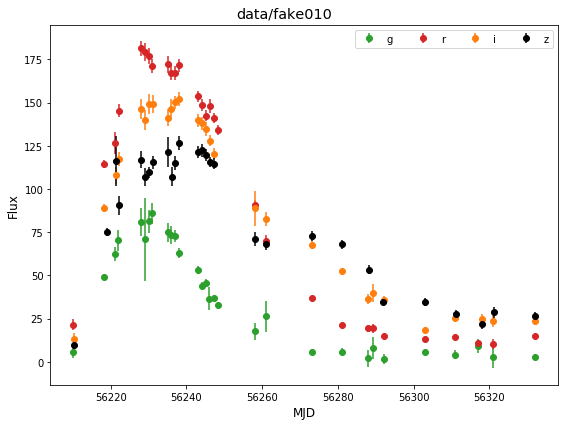

In [7]:
lc = LightCurve('data/fake010.csv')
lc.plot_multicolor_lc()

#### *Figure 15: The light curve of FAKE010 - a supernova, Credit: Richard Kessler (University of Chicago), <a href="http://adsabs.harvard.edu/abs/2010PASP..122.1415K">SNPhotCC</a>*

You might look at something like this light curve, and try to estimate something like a full-width at half maximum to determine a time-scale. 

That wouldn't be a bad idea for type Ia supernovae, but of course not everything in the dataset is a supernova...

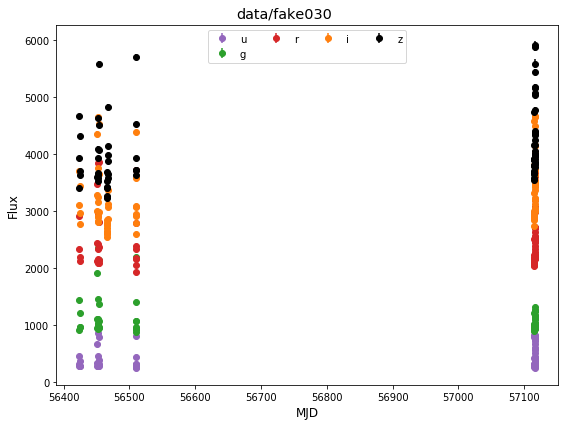

In [8]:
lc = LightCurve('data/fake030.csv')
lc.plot_multicolor_lc()

#### _Figure 16: The ligt curve of FAKE030 - looks a bit more messy. Credit: Abhijit Saha (NOAO)_

This object for instance is something very different - it's a variable star. It's got a characteristic time scale, but you wouldn't know it from a simple light curve plot.

We can use a Fourier technique known as the Lomb-Scargle Periodogram to estimate the characteristic scale, at least given some search range.

In [9]:
from gatspy.periodic import LombScargleMultiband

In [10]:
model = LombScargleMultiband(fit_period=True)

# we'll window the search range by setting minimums and maximums here
# but in general, the search range you want to evaluate will depend on the data
# and you will not be able to window like this unless you know something about
# the class of the object a priori
t_min = max(np.median(np.diff(sorted(lc.DFlc['mjd']))), 0.1)
t_max = min(10., (lc.DFlc['mjd'].max() - lc.DFlc['mjd'].min())/2.)

model.optimizer.set(period_range=(t_min, t_max), first_pass_coverage=5)
model.fit(lc.DFlc['mjd'], lc.DFlc['flux'], dy=lc.DFlc['flux_err'], filts=lc.DFlc['passband'])
period = model.best_period
print(f'{lc.filename} has a period of {period} days')

Finding optimal frequency:
 - Estimated peak width = 0.00906
 - Using 5 steps per peak; omega_step = 0.00181
 - User-specified period range:  0.1 to 10
 - Computing periods at 34317 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
data/fake030 has a period of 0.43305791539072674 days


Takes a while eh... you could narrow the search range a bit, if you knew something about the astrophysical class of the object of interest... which is what you want to determine.

Still it's a fairly reliable way to extract a period from an irregularly sampled recurring time-series. 

Folding the observations to this period takes that noisy time-series and shows you some of the structure in the data. 

If you look at the light curve below and compare it to the hand drawn diagram of variable stars from 1906, bearing in mind that it's period is a bit less than 12 hours, you should be able to classify it pretty easily.

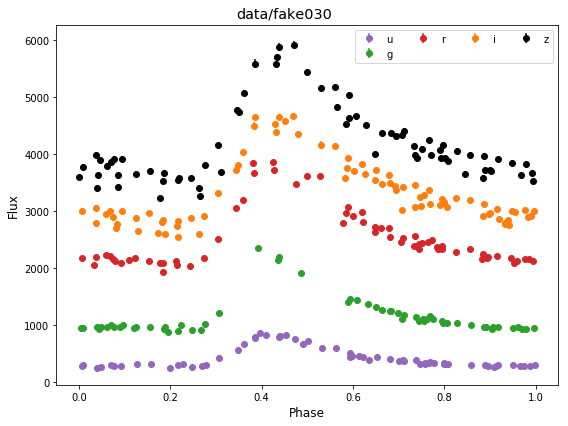

In [11]:
phase = (lc.DFlc['mjd'] /period) % 1
lc.plot_multicolor_lc(phase=phase)

#### _Figure 17: The "folded" light curve of FAKE030, after determining a period using the Lomb-Scargle algorithm_

This folded curve is suitable for feature extraction, but we don't a priori know what objects have periodic structure and which ones don't. 

Also, some classes of objects exhibit stochastic variability - they don't repeat periodically, but they do change more on some time scales than others. 

Active galactic nucleii - massive black holes surrounded by hot dust and gas at the centers of galaxies - exhibit this kind of behavior.

Still, you might look at the RR Lyrae and supernova light curve and conclude that extracting information about shape and the relative strengths of the signal in different passbands is a promising way to encode the information on each object... 

...and would be useful for classification. 

And you'd be right! 

But there's another astrophysical effect that affects the determination of time scales and colors, and this one has nothing to do with the nature of the object - what it is - but rather, *where* it is.

## 4. Primer cont'd - Metadata Provided with Light Curves
<a id="section4"></a>

Real astrophysical data is from sources on the sky, which means that we normally have contextual information in addition to the light curve to help with classification - if a source is near a galaxy or if it is isolated for instance.

With PLAsTiCC, since we're simulating the time series, we don't have the full breadth of this contextual information. 

We can't really simulate it from previous surveys, because none of them achieve the same sort of signal-to-noise that LSST will - one of the big motivations for building LSST in the first place.   

While we can't give you all the contextual information, we do provide some metadata - a few essential elements that you _may_ want to use to augment the features extracted directly from the light curves (this has pluses and minuses). 

Let's start by taking a look at the metadata table (a stub of which is provided with the starter kit)

In [12]:
header = Table.read('data/plasticc_training_set_metadata_stub.csv', format='csv')
header

object_id,ra,decl,gall,galb,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64
615,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,nan,0.017,92
713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6153,0.55,45.3873,0.007,88
730,33.574219,-6.579593,170.455585,-61.548219,1,0.232,0.2262,0.0157,40.2561,0.021,42
745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90
1227,35.683594,-5.379379,171.992947,-59.253501,1,0.0,0.0,0.0,nan,0.02,65
1598,347.84671,-64.760857,318.929827,-49.143596,1,0.1352,0.182,0.0304,39.7279,0.019,90
1632,348.595886,-63.07262,320.023289,-50.71306,1,0.6857,0.7014,0.01,43.1524,0.021,42
1920,149.414062,3.433834,234.919132,42.24555,1,0.3088,0.3229,0.336,41.1401,0.027,90


That's a fair number of fields. `object_id` is a simple integer ID number that uniquely identifies each object, and corresponds to the object's ID in the light curve files, but the rest might not be familiar.

### 4a. Coordinates on the Sky
<a id="section4a"></a>

The next few columns of metadata are related to an object's position in our three spatial dimensions.

We use a spherical coordinate system on the sky, with the positions of stars indexed by a two-tuple that describes where they were on the 1st of January in the year 2000.

These two angles are called the "Right Ascension" (R.A.) and the "Declination" (often just Dec.) corresponding to longitude and latitude on the Earth. 

These coordinates are supplied in the `ra` and `decl` columns of the metadata table.

Wiki has a good illustration of this coordinate system:

<center><img src="media/Celestial_Coordinates.gif"></center>

#### *Figure 18: Equatorial coordinates, Credit: https://en.wikipedia.org/wiki/Right_ascension*

If we unroll the sky into a flat <a href="https://en.wikipedia.org/wiki/Aitoff_projection">Aitoff projection</a>, we can get a view of the entire sky:

<center><img width="80%" src="media/allsky_equatorial.jpg"></center>

#### _Figure 19: The sky in equatorial coordinates with a galactic coordinate grid overlaid_

Splitting the sky into two hemispheres by extending the Earth's equator outwards, the Milky Way forms a graceful arc.

Lines of constant Right Ascension and Declination are in grey, while the green lines indicate a coordinate transform, where the plane of the galaxy defines the equatorial plane, instead of the Earth's equator - a galactic coordinate system.

LSST, based on Chile, views the southern sky. Comparing how the galaxy looks in this projection should help make sense of the otherwise weird looking pattern of observations that LSST plans to obtain:

<center><img width='60%' src="media/skymap_minion1016.jpg"></center>

#### _Figure 20: The LSST "minion 1016" exposure map in celestial coordinates. Credit: LSST Corporation_

PLAsTiCC simulates the "Wide-Fast-Deep" Survey - the main LSST program, and the "Deep Drilling Fields" - a few small regions where LSST will get more observations for specialized scientific studies. 

Which objects are in the WFD vs the DDF are specified by the `ddf_bool` column in the header (1 if in DDF, 0 otherwise). 

Note that you can also get this information from the `object_id` column (`object_id` < 1,000,000 are in DDF).

The DDFs will have more observations, but cover a much smaller chunk of sky. Consequently, the light curves will have better sampling, and potentially be found farther away in our Universe, but there's fewer objects. You may wish to treat the DDF and WFD objects separately and build different sorts of classifiers for them. This is entirely up to you, and the two sets of objects are weighted exactly the same, irrespective of which field they originated from.

### 4b. Galactic Coordinates
<a id="section4b"></a>

RA and Dec are "equatorial" coordinates - a coordinate system where the Earth's equator is extended outwards into infinity and splits space into an imaginary north and south hemisphere.

This coordinate system makes sense if you are building a telescope on Earth in the southern hemisphere and have to decide how you want to observe the sky.

But, if we're talking about objects in the distant Universe, it makes sense to not make the Earth the center of it.

We can rotate the sky so that the plane of our galaxy defines the equator, like so:

<center><img width="80%" src="media/allsky_galactic.jpg"></center>

#### _Figure 21: The sky in galactic coordinates with a equatorial coordinate grid overlaid_

where I'm leaving the celestial coordinate grid (in yellow - notice how they no longer correspond to the North and South relative to the plane of our Galaxy).

If you prefer to work with galactic coordinates instead of equatorial coordinates (`ra` and `decl`), these are provided in the header in the columns `gall` and `galb`.

### 4c. Redshift
<a id="section4c"></a>

The position of a source on the sky is a tuple of two numbers (in either equatorial or galactic coordinates), but we live in a Universe with (at least) 3 spatial dimensions. The third number we use to locate objects in 3D space isn't even a distance from the origin - it's a speed! We call it the "redshift."

<center><img src="media/redshift.jpg"></center>

#### _Figure 22: "Redshift" is a measure of how fast a distant source (with more distant on the top) is moving relative to us along the line of sight, and is determined from how much the wavelength (or alternately, the frequency) of the absorption and emission lines of atoms change, relative to what we see here on Earth (bottom panel)_

Redshift is so named because if you take the light from distance astrophysical sources and pass it through a prism, you see the same atomic fingerprint of elements and molecules you find here on Earth... just shifted.

If the source is moving towards us, things are shifted to the blue (or higher frequencies), while if the source is moving away from us, things are shifted to the red (or lower frequencies). 

This isn't all that different from the Doppler shift of the sound of an ambulance or police siren moving across you - it'll increase in frequency as the vehicle approaches you, and decrease in frequency as it moves away. 

You can convert the change in frequency or wavelength into a speed using:

$$z = \frac{\lambda_{\text{Source}} - \lambda_{\text{Earth}}}{\lambda_{\text{Earth}}} = \frac{\Delta \lambda}{\lambda}  \sim \frac{v_r}{c}$$

where $z$ is the redshift, $\lambda_{\text{Earth}}$ is the original wavelength we measure on Earth, and $\Delta \lambda$ is the change in wavelength, $v_r$ is the recession velocity and $c$ is the speed of light.

## _<center> AN IMPORTANT NOTE </center>_

For historic reasons, redshift is denoted with the letter $z$. This is also the same character as the z passband in LSST (and other surveys), but the two aren't related.

There's a problem though - to measure this accurately we need _spectroscopy_. 

The same spectroscopy that is expensive and hard to get to classify transients, which is the raison d'être for PLAsTiCC in the first place...

But just as with this challenge, there's a solution that involves getting images through broad passbands and extracting ratios of brightness in different passbands to get an estimator of the redshift. 

Therefore, in the header, you get two redshifts! `hostgal_specz` is the spectroscopic redshift of the host-galaxy of an event, while `hostgal_photoz` is the photometric redshift of the host-galaxy. 

## _<center> ANOTHER IMPORTANT NOTE </center>_

The training set has spectroscopic redshifts for all sources. You'll notice quickly that they don't always agree with the photometric redshift. The photometric redshift is sometimes wrong. Consequently, we also give you an estimate of the 68% uncertainty on the photometric redshift (which itself might be inaccurate...) - `hostgal_photoz_err`. Be warned though that the actual photometric redshift distribution is asymmetric, and the redshift is not likely to be less than zero, so you might want to treat it as just a weight. Why is the redshift unlikely to be less than 0... we'll get to that in a bit.

The test set does not have spectroscopic redshifts for all sources. There's a few because we simulate occasionally getting lucky and finding a new source in a galaxy which already had spectroscopy, but the vast majority of them will be `NaN`. You could potentially try to use the training set, together with the subset of the test data that does have both spectroscopic and photometric redshifts to make a better redshift predictor if you like, or you could ignore it altogether.

That said, redshift is a great feature! We know how to separate extragalactic and galactic sources pretty well, so we simulate this ability by setting the redshifts of galactic sources to exactly `0`. That tells you they are within the galaxy and reduces the size of the possible models they might be, but doesn't identify which is which - that's still your challenge! Most machine learning techniques will pick this feature of redshift up easily, but you might use it to build separate classifiers for extragalactic and galactic sources if you like.

### 4d. A view of our cosmic neighborhood
<a id="section4d"></a>

You might already have noticed the fuzzy blob in the Southern hemisphere, below and to the right of center of our galaxy in galactic coordinates.

You can get a clearer view of it from ESA's GAIA satellite without a coordinate grid on top. 

<center><img width="60%" src="media/Gaia_milky_way.jpg"></center>

#### _Figure 23: The GAIA view of our Galaxy, Credit: ESA/GAIA_

This fuzzy blob below and to the right of center is called the Large Magellanic cloud - a companion galaxy to our Milky Way. 

The other fuzzy blob near it is called the Small Magellanic Cloud. You can see it with your own eyes from a dark site in the southern hemisphere. 

(You might even be able to spot some galaxies in the northern hemisphere, but remember the sky in galactic coordinates doesn't look like the sky you'd see from Earth)

The redshift of the Large Magellanic Cloud is a whopping 0.000875 - i.e. the wavelength of light hasn't exactly changed much. 

That's about 163 miles/second (or 262 km/s) - fast, but less than a thousandth of the speed of light.

If we color the galaxies in the nearby Universe that we can see from Earth by redshift with a small telescope, there are many sources that we can see with higher redshifts. 

<center><img width="70%" src="media/large_scale_structure.jpg"></center>

#### _Figure 24: The low redshift Universe, Credit: Tom Jarrett, IPAC/Caltech_

Our spectrographs are sensitive enough for it to have been possible to measure these redshifts even a century ago. Many of the redshifts of these nearby galaxies was first measured by Vesto Slipher back in 1917. 

### 4e. Cosmology
<a id="section4e"></a>

In fact, you might notice that all of the redshifts are positive - almost everything is moving *away* from us, 

In 1927, Georges Lemaître, proposed that this meant the Universe was expanding. 

The first widely known measurement of this expansion rate came two years later, from Edwin Hubble who showed definitely that the further galaxies were from our own, the faster they were moving away.

Hubble did this by measuring the distances to these galaxies using a special class of variable stars called Cepheids (see that figure from Popular Science Monthly again for an example) that have a relation between their period and how intrinsically bright they are. 

<center><img width ="30%" src="media/hubble_cepheid.jpeg"></center>

#### _Figure 25. Hubble's Glass Plate - notice the "Var!" in the corner. Hubble was using visual inspection for classification, Credit: Carnegie Observatories_

Measure the period  of a Cepheid and you figure out how bright they are supposed to be. Measure how bright they appear, and compare the two, and you've got yourself a measurement of the distance.

And the data at the time suggested that this increase was linear.

$$ v_r = H_0 \cdot D \sim c\cdot z $$

where $D$ is the "luminosity" distance to the object and the dot ($\cdot$) operator is a shorthand for the multiplication ($\times$) operator. 

This is Hubble's plot of his measurements:
<center><img src="media/hubble_law.jpeg"></center>

#### _Figure 26. Hubble's Hubble Diagram showing the Universe expanding, Credit: Edwin Hubble_

We call this the "Hubble Law" and this kind of plot a "Hubble Diagram" (well Hubble didn't - he called it "Figure 1.")

This linear relation between redshift and distance is approximate (hence the $\sim$ sign).

As we look to farther horizons, to determine the expansion history of the Universe takes the equations of Einstein's General Theory of Relativity. 

Measuring this expansion history takes bright sources that we can determine the distance to, like those type Ia supernovae like SN1998bu. 

When scientists used type Ia supernovae to do this for the first time in 1998, they discovered something remarkable - that the Universe wasn't just expanding, but the expansion was accelerating.

#### *Something is _pushing_ distant galaxies away from us at an ever increasing rate!*

This is one of the best current map of that expansion using type Ia supernovae:

<center><img src="media/JLA_HubbleDiagram.png"></center>

#### _Figure 27. The JLA Hubble Diagram, Credit: Marc Betoule (Paris Center for Cosmological Physics)_

Hubble's data covers such a small range that it doesn't even show up on this plot. We've done a lot in 80 years!

The teams that discovered this won the Nobel prize for their work in 2011. 

So we've got to identify such type Ia supernovae among all of the ones that LSST will find... hopefully things are beginning to fit together, and this is giving you a sense for the big picture!

You might prefer to have the y-axis - called the distance modulus - related to the base 10 logarithm of the luminosity distance, rather than the redshift provided in `hostgal_photoz`. 

For your convenience, this is provided in the header as a column named `distmod`. 

For galactic objects with `hostgal_photoz`$ = 0 $, the `distmod` is reported as `NaN` (the distance would be 0, and taking the logarithm of 0 is a bad idea).

We don't provide another column for distance modulus that was derived from `hostgal_specz` but there's a lookup table included with the dataset if you need to compute this (you probably don't). This is a purely computed quantity and is provided for convenience. It's not a measured distance to each source - actually measuring distances is complicated. You can watch a video about how we do it <a href="https://ed.ted.com/lessons/how-do-we-measure-distances-in-space-yuan-sen-ting">here</a>. 

Because the speed of light is fixed, and the distance to sources is increasing, you can also compute a how long it took for light from a source at some redshift took to reach up. This is also in the lookup table. You also don't need this, but it is cool to get a sense for the history of our Universe. 

General relativity in the expanding Universe gives us a time machine. 

As we look farther our, we look further back in time. 

Here's a visual timeline of the history of our Universe:

<center><img src="media/UniverseTimeline.jpg"></center>

#### _Figure 28. A Timeline of our Universe, Credit: BBC Two, Stargazing Live, Public access NASA images_

Now looking at Figure 25 and the equation above it, you might notice that sources can have a redshift of greater than one i.e. appear to be moving faster than the speed of light! And you might have heard that it isn't possible to go faster than the speed of light. This is how the cosmological redshift differs from the Doppler effect. It's not the physical motion of the sources that is causing the change in frequency, but rather the expansion of the Universe itself - that the space between us and the source is stretching! Your PLAsTiCC dataset will include objects up to a redshift of 3. 

If everything seems to be moving away with respect to us on Earth, you might also be tempted to think we're the center of the expansion of the Universe. We aren't. We could move to any other point in the Universe and we'd see the same behavior. This is a counterintuitive consequence of Einstein's General Theory of Relativity, and living in a Universe that is homogeneous (same from all positions) and isotropic (same in all directions). If you find this stuff fascinating, you might want to read <a href="https://www.forbes.com/sites/startswithabang/2018/04/17/the-most-important-equation-in-the-universe/#8869ba60da5c">this.</a>

### 4f. Dust
<a id="section4f"></a>

Depending on where you are looking on the sky, there's a lot of structure in our Milky Way - lanes of gas and dust obscure the view of stars and galaxies behind it.

This becomes even more apparent if we look with a different instrument and in a different passband, more sensitive to only the dust. 

This view from ESA's Planck satellite really drives that home:

<center><img src="media/dust_map.jpeg"></center>

#### _Figure 29: A dust map of the Milky Way from Planck, Credit: ESA / NASA / JPL-Caltech_

Of course, the dust isn't a single layer, and has 3D structure. 

Astronomers can map this structure using careful observations of lots of stars.

This 3D map was made with the Pan-STARRS telescope which has a 1.2 gigapixel camera and a similar field-of-view to LSST, but is a much smaller telescope.

In [13]:
%%HTML
<p>
<div align="middle">
<video width="60%" controls>
      <source src="media/MilkyWayDust.mp4" type="video/mp4">
</video>
</div>
</p>

#### _Figure 30: A Fly Through of our Galaxy's Dust, Credit: Gregory Green (Stanford/KIPAC)_

Dust, like increasing luminosity distance (and therefore redshift) in our Universe, makes things fainter and redder. We're all used to this effect - we see it with our Sun and Moon everyday. Our atmosphere scatters blue light more than the red light, making the sun and the moon appear more red than if we could see them from space. As the sun gets near the horizon and the light from it has to pass through more of the Earth's atmosphere to reach us, it appears even redder than when it is high in the sky. 

While the light curves we've provided are corrected for the dimming and reddening - called the extinction - along the line of sight in our Galaxy, this correction isn't perfect, because we've not got perfect knowledge of how much dust there is along any line of sight. You'll notice the map in the video is higher resolution towards the center of the galaxy where there are more stars, and lower resolution in the opposite direction for instance.

Additionally, extragalactic sources can also suffer from extinction _in their own host galaxies._ Galactic sources are nearer us and brighter, and because they are _in_ our Galaxy, they are likely to be in the plane. All said then, you should expect to find that Galactic sources have a different sort of distribution of dust along the line of sight to them than extragalactic sources.

The correction we applied to the light curves can be described by a single number for our Milky Way.

This is called $\text{MW}~E(B-V)$ (MW = Milky Way, E = Extinction between the Blue and Visual, or B-V) and reported in the header in the column named `mwebv`. 

You will not need to correct the light curves anymore, but you might be able to use this piece of metadata to distinguish some populations from others using clustering techniques for instance.

***

That's it! Phew! It's the minimal bits of the astrophysics you may need to make sense of the data and start to tackle this challenge. 

This notebook does not need the actual challenge data.

In a companion notebook, `plasticc_classification_demo.ipynb`, included with this starter kit, we'll build a toy classifier on the challenge data, and introduce some of the useful packages astronomers use to tackle this problem.

***

If you have more questions, you can find the PLAsTiCC dev team on the Kaggle forums, and we'll do our best to answer your questions if we can. We hope you have fun and we look forward to your submissions - remember, your work will influence the entire LSST project. 

Come help us explore the Universe!

/cheesy